# Finding a classifier for your image data with scivision

In [1]:
from scivision import default_catalog, load_pretrained_model

### TODO:
- [ ] make the pokemon dataset labelled
- [ ] get the classifier to work

In [2]:
# Get the data repo url
data_catalog = default_catalog.datasources.to_dataframe()
pokemon_url = data_catalog[data_catalog.name == "pokemon"].url.item()
pokemon_url # Why not paste the repo link into your browser and see how it looks?

AnyUrl('https://github.com/edwardchalstrey1/pokemon', scheme='https', host='github.com', tld='com', host_type='domain', path='/edwardchalstrey1/pokemon')

In [3]:
compatible_models = default_catalog.compatible_models("pokemon").to_dataframe()
compatible_models

,name,description,models,tasks,url,pkg_url,format,pretrained,labels_required,institution,tags
5,mapreader-plant,automated detection of plant patches in images...,(),"(TaskEnum.classificiation, TaskEnum.object_det...",https://github.com/alan-turing-institute/mapre...,git+https://github.com/alan-turing-institute/m...,image,True,False,"(alan-turing-institute,)","(2D, plant, phenotype, rgb, biology, agriculture)"
6,resnet50-plantkton,automated classification of plankton images co...,(),"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/plank...,git+https://github.com/alan-turing-institute/p...,image,True,False,"(alan-turing-institute, cefas, plankton-analyt...","(2D, plankton, ecology, environmental-science)"
8,image-classifiers,None,(),"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute,)","(classification, 2D, image)"
9,huggingface-classifiers,None,"(microsoft_swin_tiny_patch4_window7_224, micro...","(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute, huggingface)","(classification, 2D, image)"


In [4]:
# Let's take a closer look at the classifier models available from huggingface
chosen_classifier = compatible_models.loc[compatible_models['name'] == 'huggingface-classifiers']
list(chosen_classifier.models)

[('microsoft_swin_tiny_patch4_window7_224',
  'microsoft_beit_base_patch16_224',
  'google_vit_base_patch16_224',
  'microsoft_beit_base_patch16_224_pt22k_ft22k',
  'facebook_deit_base_distilled_patch16_224',
  'microsoft_swin_large_patch4_window7_224',
  'google_vit_base_patch32_384',
  'nvidia_mit_b0',
  'microsoft_swin_base_patch4_window7_224',
  'microsoft_swin_small_patch4_window7_224',
  'imjeffhi_pokemon_classifier')]

In [5]:
classifier_url = chosen_classifier['url'].item()

# Load the pokemon classifier which we found in the list of huggingface models
pokemon_classifier = load_pretrained_model(classifier_url, model='imjeffhi_pokemon_classifier')

In [6]:
from scivision import load_dataset

In [7]:
pokemon = load_dataset(pokemon_url)
pikachu = pokemon.pikachu().to_dask()

/opt/anaconda3/envs/scivision/lib/python3.9/site-packages/xarray/core/dataset.py:2172: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [8]:
import matplotlib.pyplot as plt

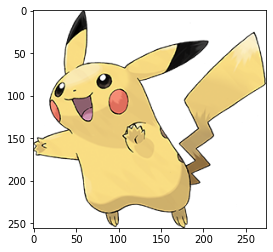

In [9]:
plt.imshow(pikachu)

In [10]:
pokemon_classifier.predict(pikachu)

'Predicted class: Absol'

In [12]:
from random import randint
all_pokemon = pokemon.pokemon().to_dask()
random_pokemon_index = randint(0, len(all_pokemon)-1)
random_pokemon = all_pokemon[random_pokemon_index]

/opt/anaconda3/envs/scivision/lib/python3.9/site-packages/xarray/core/dataset.py:2172: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


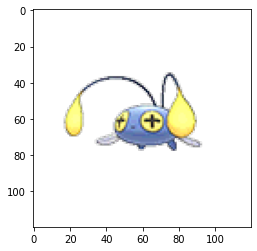

In [13]:
plt.imshow(random_pokemon)

In [14]:
pokemon_classifier.predict(random_pokemon)

'Predicted class: Houndour'